# Foundations of Computational Economics #5

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Python essentials: control flow and functions

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/KDOH2R-Ambk](https://youtu.be/KDOH2R-Ambk)

Description: Flow control, user defined functions. Sieve of Eratosthenes example.

### Plan for the lecture

1. Flow control  
1. User defined functions  


📖 Kevin Sheppard “Introduction to Python for Econometrics, Statistics
and Data Analysis.” *Chapters: 3, 5, 10, 11, 13, 18, 22*

### Flow control: conditional expression and loops

Branch the program depending on a condition

- if  
- if .. else  
- if .. elif  
- if .. elif .. else  


**Remember about indentation!**- Should be 4 spaces according to PEP8 - Better not use Tab

#### Examples of if-then-else

In [1]:
x = 2
y = 2.0
z = [1, 2.1, 3.0, 0.0]

if y==2 and z[-1] >= 0.0:
    print("Condition 1")
elif y<2:
    print("Condition 2")
else:
    print("Condition 3")

Condition 1


In [2]:
x = True
y = False

if x and y:
    print("Condition 1")
elif x and not y:
    print("Condition 2")
elif not x and y:
    print("Condition 3")
elif not x and not y:
    print("Condition 4")
else:
    print("Condition 5")

Condition 2


#### Pass statement

Do nothing, but have correct indent

In [3]:
if True:
    pass
else:
    print("check")
print("done")

done


#### Ternary conditional operator

In [4]:
a, b, condition = 1, 3, True

a if condition else b      # expression, not a statement

c = a if condition else b  # therefore this is possible

#### Flow control: loops

- for  
- while  
- break  
- continue  
- for .. else, while .. else  


**Remember about indent**- Should be 4 spaces according to PEP8 - Better not use Tab

#### Examples of for

In [5]:
for i in [0,1,2,3,4,5]:
    print("A iteration %d" % i)
print()

for i in range(5):
    print("B iteration %d" % i)

A iteration 0
A iteration 1
A iteration 2
A iteration 3
A iteration 4
A iteration 5

B iteration 0
B iteration 1
B iteration 2
B iteration 3
B iteration 4


#### List comprehensions

In [6]:
x = []
for i in range(15):
    if i%3==0:
        x.append("item %d"%i)
x

['item 0', 'item 3', 'item 6', 'item 9', 'item 12']

In [7]:
x = ["item %d"%i for i in range(15) if i%3==0]
x

['item 0', 'item 3', 'item 6', 'item 9', 'item 12']

#### Multiple indexes in list comprehensions

In [8]:
for i,j in zip(range(4),["a","b","c","d"]):
    print("i=%d j=%s"%(i,j))

i=0 j=a
i=1 j=b
i=2 j=c
i=3 j=d


In [9]:
p= [x**y for x in  (2,3,5) for y in range(5)] #three power series
p

[1, 2, 4, 8, 16, 1, 3, 9, 27, 81, 1, 5, 25, 125, 625]

#### For .. else

Very useful to check if for loop did not **break**

In [10]:
k=0
for i in range(100):
    if k>15:
        break
    if i%5==0:
        k+=1
else:
    print("i went all the way up to %d"%i) #only runs if loop completed
print("loop complete with k=%d i=%d"%(k,i))

loop complete with k=16 i=76


#### While .. break .. continue example

**Sieve of Eratosthenes** to find prime numbers up to a certain value

Algorithm:
- initialize the list of primes with all integers
- go through a list of divisors (have to be in the list of primes)
- cross all candidates divisible by the considered divisor
- stop when all divisors up to the boundary are considered

Exercise: how can the algorithm be improved?

In [11]:
upper = 23
primes = list(range(1,upper+1))  # all numbers between 1 and upper
divisor = 1  # initial divisor
while True:
    divisor+=1  # next divisor
    if divisor>upper:  # checked all divisors (?)
        break
    if not divisor in primes:
        continue  # skip divisor which is not itself prime
    i=0
    while i<len(primes):
        if primes[i]!=divisor and primes[i]%divisor==0:
            primes.remove(primes[i])  # remove, next is with the same index
        else:
            i+=1 # skip to go to next
    print("divisor %d:"%divisor,primes)
print("Primes up to %d are:" % upper,primes)

divisor 2: [1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
divisor 3: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
divisor 5: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
divisor 7: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
divisor 11: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
divisor 13: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
divisor 17: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
divisor 19: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
divisor 23: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]
Primes up to 23 are: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23]


### User defined functions

- particular function in the code  
- inputs and outputs  
- can occur in the same file as the main program  
- docstrings **!!!**  

#### Defining a custom function

In [12]:
def my_function():
    '''This is docstring for my function which explains what the function does:
       This function simply returns zero
    '''
    return 0.0

# call from the main program
x=my_function()
print(x)

# see docs
help(my_function)

0.0
Help on function my_function in module __main__:

my_function()
    This is docstring for my function which explains what the function does:
    This function simply returns zero



#### Input arguments

Python supports **named arguments** as well as **positional arguments**

Functions can have default values for optional arguments

In [13]:
def my_function(a,b,c = 5):
    '''Build a list from three input arguments'''
    return [a,b,c]

# call from the main program
x=my_function(0,"test")
print(x)
y=my_function(a="one", c=3, b="two")
print(y)

[0, 'test', 5]
['one', 'two', 3]


#### Variable scope

In [14]:
def my_function(a, b):

    def my_nested_function(c, d):
        print("my_nested_function variables:")    # printing all variables in the scope of the function
        for symbol, value in locals().items():    # printing all variables in the scope of the function
            print ("    %s=%r "%(symbol,value))   # printing all variables in the scope of the function
        return c + d

    print("my_function variables are:")           # printing all variables in the scope of the function
    for symbol, value in locals().items():        # printing all variables in the scope of the function
        print ("    %s=%r "%(symbol,value))       # printing all variables in the scope of the function

    x = a * b * my_nested_function(a,b)
    return x

# call from the main program
x=10
y=2
print('The output from my function is ',my_function(x,y))

my_function variables are:
    a=10 
    b=2 
    my_nested_function=<function my_function.<locals>.my_nested_function at 0x7fe220357dd0> 
my_nested_function variables:
    c=10 
    d=2 
The output from my function is  240


#### Lambda functions (inline functions)

Short way to define simple functions, useful in bigger language constructs

In [15]:
def f(x):
    return x**3

y = lambda x: x**3

print("f(5)=%f"%f(5))
print("y(3)=%f"%y(3))

f(5)=125.000000
y(3)=27.000000


#### Example of user defined function: memory usage

First, plotting function

In [3]:
def my_plot(d):
    '''Makes a nice plot using passed data'''
    import matplotlib.pyplot as plt
    plt.plot(d["x"],d["y"])
    plt.axis([min(d["x"]),max(d["x"]),0,max(d["y"])+1])
    plt.ylabel('size in memory, bytes')
    plt.xlabel('steps of variable update')
    plt.show()

In [4]:
import sys
def memory_usage(var,grow,steps=10):
    '''Returns data on memory usage when var is grown using supplied function for given number of steps'''
    d={"x":[],"y":[],"v":[]} # dictionary for x, y data, and values
    for i in range(steps):
        var=grow(var) # next value
        d["v"].append(var)
        d["x"].append(i+1) # start with step 1 rather than 0
        d["y"].append(sys.getsizeof(var))
    return d

Last value: ['*******', '********', '*********', '**********', '***********']


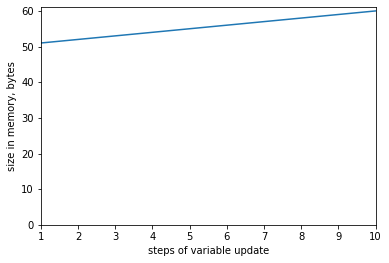

In [5]:
d=memory_usage(var='*',grow=lambda x: x+"*",steps=10)
# d=memory_usage(var='*',grow=lambda x: x*2,steps=10)
# d=memory_usage(var=1,grow=lambda x: x*2,steps=200)
# d=memory_usage(var=1e249,grow=lambda x: x*2,steps=200)
print("Last value: %r"%d["v"][-5:])
my_plot(d)

### Further learning resources

- Python book: Kevin Sheppard “Introduction to Python for Econometrics,
  Statistics and Data Analysis.” 3rd Edition University of Oxford
  Thursday 1st February, 2018  
- Coding style
  [https://docs.python-guide.org/writing/style/#idioms](https://docs.python-guide.org/writing/style/#idioms)  
- Formatting output
  [https://pyformat.info/](https://pyformat.info/)  
- Python inbuilt functions
  [https://docs.python.org/3/library/functions.html](https://docs.python.org/3/library/functions.html)  